The table presents data on the number of individuals infected with a certain infectious disease in a city over 5 consecutive weeks:

| Week | Infected individuals |
| :--: | :-: |
| 1 | 3 |
| 2 | 128 |
| 3 | 115 |
| 4 | 1050 |
| 5 | 13500 |

Find the generalized polynomial that interpolates the data using an appropriate basis.

Illustrate the solution graphically.

Sample basis include:

$
{1, x, x^2, ..., x^n}
$

$
{1, e^x, e^{2x}, ..., e^{nx}}
$

$
{1, \sin(x), \cos(x), ..., \sin(nx), \cos(nx)}
$

$
{1, e^{-x}, e^{-2x}, ..., e^{-nx}}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nodes = np.array([1, 2, 3, 4, 5])
values = np.array([3, 125, 115, 1050, 13500])

We will choose the exponentially increasing basis.

In [39]:
basis = lambda x, n: np.e ** (n * x)

n = nodes.size

matrix = np.ones([n, n])

for row in range(n):
    for column in range(n):
        matrix[row, column] = basis(nodes[row], column)

coefficients = np.linalg.solve(matrix, values)

def my_exp_poly(x):
    return sum(coefficients[i] * basis(x, i) for i in range(n))

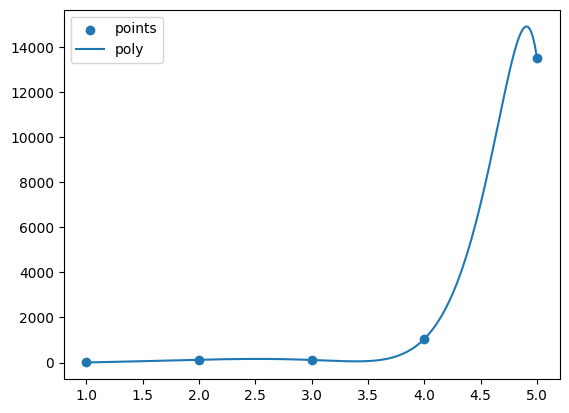

In [40]:
x_axis = np.linspace(nodes.min(), nodes.max(), 200)

plt.scatter(nodes, values)
plt.plot(x_axis, my_exp_poly(x_axis))
plt.legend(['points', 'poly'])
plt.show()